# Analysis of COVID impact on US household - Data Cleaning



<h3> Motivation </h3> 

<p>The goal of this analysis is to gauge the impact of the pandemic on overall household characteristics such as employment status, housing, education disruptions, and dimensions of physical and mental wellness. There is a large amount of emotionally negative stimuli related to the COVID-19 pandemic. How do people prepare themselves in difficult times like this? Analyzing and exploring people's response to pandemic can provide useful insights into people's perspective about COVID and the challenges they face.</p>

<p>As we all know,the impacts of the pandemic and the economic fallout have been widespread, but are particularly prevalent among Black, Latino, Indigenous, and immigrant households. There is also an impact on gender. This analysis will deep dive into some of the impacts of COVID by Age group, race and ethinicity, and gender. We also try to understand the different groups of people based on various characteristics pertaining to COVID. The research questions will target specific variables. Below are some references that tracks the COVID impacts: </p>
<li><a href='https://www.cbpp.org/research/poverty-and-inequality/tracking-the-covid-19-recessions-effects-on-food-housing-and'>Covid Recession effects</a></li>
<li><a href='https://www.cdc.gov/nchs/covid19/pulse/mental-health.htm'>Covid data from NCHS</a></li>


<h3>Data Source</h3>
<p>The <a href='https://www2.census.gov/programs-surveys/demo/technical-documentation/hhp/2020_HPS_Background.pdf'>Household Pulse Survey</a> provides timely data to help understand the experiences of American households during the coronavirus pandemic. Data for this analysis is obtained from the Phase 1 Household Pulse Survey that began on April 23 and ended on July 21, 2020. The dataset is very rich and informative. It dataset has 105 variables, 1088314 observations and includes employment status, food security, housing, physical and mental health, access to health care, and educational disruption. In order to support the nation’s recovery, we need to know the ways this pandemic has affected people’s lives and livelihoods. Data from these datasets will show the widespread effects of the coronavirus pandemic on individuals, families, and communities across the country. </p>

<p>The survey was conducted by an internet questionnaire, with invitations to participate sent by email and text message. Housing units linked to one or more email addresses or cell phone numbers were randomly selected to participate, and one respondent from each housing unit was selected to respond. All the data has been de-identified.</p>

<h4> Links to Data set and Data dictionary</h4>
<ul><li>The Phase 1 survey datasets are available for public use under <a href='https://www.census.gov/programs-surveys/household-pulse-survey/datasets.html'>census.gov</a> website as weekly files.</li>
<li>Data dictionary is available in the census.gov website under the link <a href='https://www.census.gov/programs-surveys/household-pulse-survey/technical-documentation.html#phase1'>Phase 1 Household Pulse Survey Technical Documentation</a></li></ul>

<h4>Download data</h4>
<p>Data is directly downloaded from census website using zipfile package<p>
  

<h4>Terms of use of census data </h4>
<p>The Census Bureau is committed to open government by sharing its public data as open data. Census data continues to be a key national resource, serving as a fuel for entrepreneurship and innovation, scientific discovery, and commercial activity.  We continuously identify and publish datasets and Application Programming Interface’s (API’s) to Data.gov in accordance with the Office of Management and Budget (OMB) Memorandum M-10-06, the Executive Order 13642 on open data, and the overall principles outlined in the Digital Government Strategy.  In
 accordance with the Open Data Policy, M-13-13, the Census Bureau publishes its information in machine-readable formats while also safeguarding privacy and security.</p>
 
 
 <h3>Research Questions</h3>
<ul>
    <li>Understand the impacts of COVID in terms of employment loss, income loss, food insufficiency, education interruptions, inability to meet housing expenses and how does this vary by Race/Ethnicity or gender? </li>
    <li>What is the impact on Mental health status (Anxiety and depression)? Is there a correlation between Mental health status (Anxiety and depression) and factors such as age, number of household members, gender, income, health status, race? How does the anxiety levels vary between first and last week of survey?</li>
    <li>How does employment loss, income loss, food insufficiency, education interruptions, inability to meet housing expenses in Washington differ as compared  to national average?</li>
    <li>How do different groups based on age, race and ethnicity differ in their behavior or attitude towards COVID. Are there any patterns observed in the population based on certain characteristics pertaining to COVID?</li> 
</ul>


<h3>Methodology</h3>
<ul><li>For <strong>question 1</strong>, Logistic regression has been used as the response indicator variables are binary in nature, all the data points are independent and the sample size is large enough. Also, chi's square test of independence has been used to compare 2 categorical varaibles which is the case here. Overall likelihood ratio test has been used to verify if the full model that includes gender, race/ethnicity tell us more about the outcome (or response) variable than a model that does not include these 2 variables.  </li>
    <p></p>
<li>For <strong>question 2</strong> , ordinal logistic regression has been used because the response variable is categorical and ordered in nature, all the data points are independent and the sample size is large enough. Also, chi's square test of independence has been used to compare 2 categorical variables which is the case here.  We also used Random features feature importance to identify the top 10 features impacting Anxiety/depression.  Overall likelihood ratio test has been used to verify if the full model that includes the predictors in question namely gender, worry, interest, income loss, food insufficiency, Age group, number of household members, income level, health status, race/ethnicity tell us more about Anxiety/depression than a model that does not include these variables. </li>
    <p></p>
<li>For <strong>question 3</strong>, Logistic regression has been used as the response indicator variables are binary in nature, all the data points are independent and the sample size is large enough. Also, chi's square test of independence has been used to compare 2 categorical variables which is the case here. Overall likelihood ratio test has been used to verify if the full model that includes state tell us more about the outcome (or response) variable than a model that does not include this variable</li>
    <p></p>
<li>For <strong>question 4</strong>, Principal component Analysis and K-means clustering have been used to identify any patterns and classify groups of people based on similar characteristics</li>
    <p></p>
<li><strong>Results</strong>
    The results will be presented as intepretation of coefficients, significance of hypothesis tests and comprehensive compilation of visualizations.</li></ul>

<h3>Source of Bias</h3>
<p> Nonsampling errors can also occur and are more likely for surveys that are implemented quickly, achieve low response rates, and rely on online response.  Nonsampling errors for the Household Pulse Survey may include:</p>

<ul><li><strong>Measurement error:</strong> The respondent provides incorrect information, or an unclear survey question is misunderstood by the respondent. The Household Pulse Survey schedule offered only limited time for testing questions. </li>
<li><strong>Coverage error: </strong>Individuals who otherwise would have been included in the survey frame were missed. The Household Pulse Survey only recruited households for which an email address or cell phone number could be identified.</li>
<li><strong>Nonresponse error:</strong> Responses are not collected from all those in the sample or the respondent is unwilling to provide information. The response rate for the Household Pulse Survey was substantially lower than most federally sponsored surveys.</li>
<li><strong>Processing error: </strong>Forms may be lost, data may be incorrectly keyed, coded, or recoded. The real-time dissemination of the Household Pulse Survey provided limited time to identify and fix processing errors.</li>
 
<p>The Census Bureau employs quality control procedures to minimize these errors.  However, the potential bias due to nonsampling errors has not yet been evaluated.</p>

<h2> Exploratory Data Analysis </h2>

<h3>Import Packages</h3>
<p> Import all the required packages</p>

In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |################################| 292 kB 15.4 MB/s eta 0:00:01
     |################################| 25.9 MB 39.7 MB/s eta 0:00:01
     |################################| 11.5 MB 34.5 MB/s eta 0:00:01
     |################################| 1.1 MB 59.9 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3.6 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd

# packages required for proecessing zip files
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

# packages for plots and graphs
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<h3>Download data from census.gov</h3>

<p>Extract the Phase 1 weekly zip files directly from census.gov urls by following the below steps. There are 12 weekly files for phase 1 survey</p>
<ul>
<li>The function getData takes an empty dataframe, week range as input, downloads all the 12 weekly files into a dataframe and return the merged dataframe as the output</li>
<li>Url takes the form <strong>https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk#/filename</strong> where # is the week number from 01 to 12 where single digit is prefixed with 0</li>
<li>Replace the file name in the above url to  HPS_Week#_PUF_CSV.zip where # is the week number from 01 to 12</li>
<li>Each of the url is downloaded as csv.zip file. Read the url using urlopen utility function </li>
<li>Extract the contents using ZipFile and BytesIO modules and save the file into pandas dataframe df1</li>
<li>Create a variable 'WEEK' in the dataframe df1 and assign it to respective week</li>
<li>Repeat the process for all the 12 weekly files, merge all the weekly dataframes into a single dataframe df and return the df as output of the function</li>
</ul>

In [5]:
def getData(df,ver_range):
    for l in ver_range:
        if(l < 10):        
            zipurl = 'https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk'+str(l)+'/HPS_Week0'+str(l)+'_PUF_CSV.zip'
        else:
            zipurl = 'https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk'+str(l)+'/HPS_Week'+str(l)+'_PUF_CSV.zip'
        print("zipurl :",zipurl)
        with urlopen(zipurl) as zipresp:
            with ZipFile(BytesIO(zipresp.read())) as zfile:
                if(l < 10):
                    df1 = pd.read_csv(zfile.open('pulse2020_puf_0'+str(l)+'.csv'))
                else:
                    df1 = pd.read_csv(zfile.open('pulse2020_puf_'+str(l)+'.csv'))
                df1['WEEK'] = l
                df = pd.concat([df,df1], axis=0, ignore_index=True)
    return df

<p>The function <strong>getdata</strong> takes the range of weeks and an empty dataframe and returns one dataframe stored in the variable df1 that has all the 12 weeks data</p>

In [18]:
ver_range=np.arange(1,13)
df = pd.DataFrame()
df1 = getData(df,ver_range)

zipurl : https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk1/HPS_Week01_PUF_CSV.zip
zipurl : https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk2/HPS_Week02_PUF_CSV.zip
zipurl : https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk3/HPS_Week03_PUF_CSV.zip
zipurl : https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk4/HPS_Week04_PUF_CSV.zip
zipurl : https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk5/HPS_Week05_PUF_CSV.zip
zipurl : https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk6/HPS_Week06_PUF_CSV.zip
zipurl : https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk7/HPS_Week07_PUF_CSV.zip
zipurl : https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk8/HPS_Week08_PUF_CSV.zip
zipurl : https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk9/HPS_Week09_PUF_CSV.zip
zipurl : https://www2.census.gov/programs-surveys/demo/datasets/hhp/2020/wk10/HPS_Week10_PUF_CSV.zip

<h3>Get the descriptive statistics, size and shape</h3>


<li>The dataset has 105 variables and 1088314 observations.</li>
<li>Dataframe.head() gives a glimpse of top 5 observations from the dataframe df1 </li>

In [19]:
df1.shape

(1088314, 105)

In [20]:
df1.head()

,SCRAM,WEEK,EST_ST,EST_MSA,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,EGENDER,AGENDER,RHISPANIC,...,EIPSPND11,EIPSPND12,EIPSPND13,SPNDSRC1,SPNDSRC2,SPNDSRC3,SPNDSRC4,SPNDSRC5,SPNDSRC6,SPNDSRC7
0,V010000001S10011099370111,1,47,NaN,1973.489532,1986,2,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,V010000001S10011900470112,1,1,NaN,1929.488419,1955,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,V010000001S18010744940111,1,26,NaN,1526.612380,1976,2,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,V010000001S37010301340112,1,1,NaN,2734.635354,1964,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,V010000001S37010480340111,1,1,NaN,681.211425,1963,2,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [235]:
#df2=df1.copy()
df1=df2.copy()

<h3>Checking for any null values</h3>

<p>The following chunk of code does  the following</p>
<ul><li>df1.isnull().sum() provides the count of null values in each variable of the dataframe and this is sorted in descending order and stored in the variable 'total' </li>
<li>df1.isnull().sum()/df1.count() provides the percentage of null values for each variable of the dataframe and stored in descending order 'percent' variable </li>
<li>Create a dataframe 'missing_data_df1' consisting of total of null values and percentage of null values in descending order</li>
<li>Display only the values form the dataframe 'missing_data_df1' where total > 0 </li>

In [236]:
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1.count()).sort_values(ascending=False)
missing_data_df1 = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_df1[missing_data_df1['Total'] > 0]

,Total,Percent
EST_MSA,754900,2.264152
SPNDSRC7,538953,0.981054
EIP,538953,0.981054
EIPSPND1,538953,0.981054
EIPSPND2,538953,0.981054
EIPSPND3,538953,0.981054
EIPSPND4,538953,0.981054
EIPSPND5,538953,0.981054
EIPSPND6,538953,0.981054
EIPSPND7,538953,0.981054


<h3>Variables of interest</h3>

<p>Here we remove all variables that have more than 15% of values missing and get the descriptive statistics of the remaining variables using dataframe.info()</p>

In [237]:
df1 = df1[missing_data_df1[missing_data_df1['Percent'] < 0.15].index]

In [238]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088314 entries, 0 to 1088313
Data columns (total 81 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   WHEREFREE4     1088314 non-null  int64  
 1   WRKLOSS        1088314 non-null  int64  
 2   ANYWORK        1088314 non-null  int64  
 3   KINDWORK       1088314 non-null  int64  
 4   RSNNOWRK       1088314 non-null  int64  
 5   UNEMPPAY       1088314 non-null  int64  
 6   PRIFOODSUF     1088314 non-null  int64  
 7   CURFOODSUF     1088314 non-null  int64  
 8   FOODSUFRSN1    1088314 non-null  int64  
 9   FOODSUFRSN2    1088314 non-null  int64  
 10  WHEREFREE3     1088314 non-null  int64  
 11  FOODSUFRSN3    1088314 non-null  int64  
 12  FOODSUFRSN4    1088314 non-null  int64  
 13  FOODSUFRSN5    1088314 non-null  int64  
 14  FREEFOOD       1088314 non-null  int64  
 15  WHEREFREE1     1088314 non-null  int64  
 16  WHEREFREE2     1088314 non-null  int64  
 17  EXPCTLOS

<p>Verify if there are any duplicate records</p>

In [239]:
df1.duplicated().sum()

0

<h3>Feature Engineering</h3>

<p>Derive new variables from existing ones  for effective interpretation and remove the redundant variables</p>
<li>For all the new variables created, we initiate them to -99 if numeric or "" if string</li>

<li>We derive a new variable RACE_ETHNICITY from RHISPANIC and RRACE based on the values each of these 2 variables can take. As per Data dictionary, if RHISPANIC is 2, then Race/Ethnicity is Hispanic else 'non Hispanic'. 
Similarly, RRACE can take values in the range 1-4 and definition of each of the races is provided in the data dictionary
1) White, Alone
2) Black, Alone
3) Asian, Alone
4) Any other race alone, or race in combination</li>

In [240]:
df1['RACE_ETHNICITY'] = ""
df1.loc[df1.RHISPANIC == 2,'RACE_ETHNICITY'] = "Hispanic"
df1.loc[(df1.RHISPANIC == 1) & (df1.RRACE == 1),'RACE_ETHNICITY'] = "White alone"
df1.loc[(df1.RHISPANIC == 1) & (df1.RRACE == 2),'RACE_ETHNICITY'] = "Black alone"
df1.loc[(df1.RHISPANIC == 1) & (df1.RRACE == 3),'RACE_ETHNICITY'] = "Asian alone"
df1.loc[(df1.RHISPANIC == 1) & (df1.RRACE == 4),'RACE_ETHNICITY'] = "Other races"

<li>We derive a new variable EMPLOSSCOVID from RSNNOWRK. 'RSNNOWRK' = [2,3,4,5,13,8,9,10,11] is associated with Employment loss due to covid. 
As per data dictionary, RSNNOWRK can be one of the following options 1) I did not want to be employed at this time; 
2) I did not work because I am/was sick with coronavirus symptoms; 
3) I did not work because I am/was caring for someone with coronavirus symptoms; 
4) I did not work because I am/was caring for children not in school or daycare; 
5) I did not work because I am/was caring for an elderly person; 
6) I am/was sick (not coronavirus related) or disabled; 
7) I am retired; 
8) I did not have work due to coronavirus pandemic related reduction in business (including furlough); 
9) I am/was laid off due to coronavirus pandemic; 
10) My employment closed temporarily due to the coronavirus pandemic; 
11) My employment went out of business due to the coronavirus pandemic; 
12) Other reason, please specify)</li>

In [241]:
df1['EMPLOSSCOVID'] = -99
df1.loc[df1['RSNNOWRK'].isin([2,3,4,5,13,8,9,10,11]),'EMPLOSSCOVID'] = 1
df1.loc[df1['RSNNOWRK'].isin([1,6,7,12]),'EMPLOSSCOVID'] = 0

<li>We derive a new variable EMP_STATUS from ANYWORK. As per data dictionary, ANYWORK is the Employment status for last 7 days and takes one of the values
1) Yes
2) No</li>


In [242]:
df1['EMP_STATUS'] = -99
df1.loc[(df1.ANYWORK==1),'EMP_STATUS'] = 1 # EMPLOYED
df1.loc[(df1.ANYWORK==2),'EMP_STATUS'] = 0 # NOT EMPLOYED

<li>If EGENDER is 1, then we tranform that to MALE as per the data dictionary, else if EGENDER is 2, then FEMALE, else OTHER</li>

In [243]:
df1.loc[(df1.EGENDER == 1),'EGENDER'] = "MALE"
df1.loc[(df1.EGENDER == 2),'EGENDER'] = "FEMALE"
df1.loc[~df1['EGENDER'].isin(['MALE','FEMALE']),'EGENDER'] = "OTHER"

<li>We derive a new variable FOOD_INSUFF from CURFOODSUF which is the Household food sufficiency for last 7 days and PRIFOODSUF which is the Food Sufficiency prior to March 13, 2020</li>

In [244]:
df1['FOOD_INSUFF'] = -99
df1.loc[(df1.CURFOODSUF > df1.PRIFOODSUF),'FOOD_INSUFF'] = 1
df1.loc[(df1.CURFOODSUF <= df1.PRIFOODSUF),'FOOD_INSUFF'] = 0

<li>If medical care is delayed in last 4 weeks due to pandemic or did not get medical care for something not related to pandemic, then we infer that overall medical delay 'MED_DELAY' is true else false</li>

In [245]:
df1['MED_DELAY'] = -99
df1.loc[((df1['DELAY'] == 1) | (df1['NOTGET']  == 1)),'MED_DELAY'] = 1
df1.loc[((df1['DELAY'] == 2) & (df1['NOTGET']  == 2)),'MED_DELAY'] = 0

<li>We derive insured status from  Health Insurance Coverage indicators HLTHINS1-6 as provided in the data dictionary </li>

In [246]:
df1['INSURED'] = -99
df1.loc[(df1.HLTHINS1==1) | (df1.HLTHINS2==1) | (df1.HLTHINS5==1),'INSURED'] = 1
df1.loc[(df1.HLTHINS1==2) | (df1.HLTHINS2==2) | (df1.HLTHINS5==2),'INSURED'] = 0 #"PRIV-UNINS"
df1.loc[(df1.HLTHINS3==1) | (df1.HLTHINS4==1) | (df1.HLTHINS6==1),'INSURED'] = 1
df1.loc[(df1.HLTHINS3==2) | (df1.HLTHINS4==2) | (df1.HLTHINS6==2),'INSURED'] = 0 #"PUB-UNINS"

<li>We derive Age group from birth year</li>

In [247]:
df1['AGE_GROUP'] = ""
df1.loc[(df1.TBIRTH_YEAR >= 1996),'AGE_GROUP'] = "18 - 24"
df1.loc[(df1.TBIRTH_YEAR >= 1981) & (df1.TBIRTH_YEAR <= 1995),'AGE_GROUP'] = "25 - 39"
df1.loc[(df1.TBIRTH_YEAR >= 1966) & (df1.TBIRTH_YEAR <= 1980),'AGE_GROUP'] = "40 - 54"
df1.loc[(df1.TBIRTH_YEAR >= 1956) & (df1.TBIRTH_YEAR <= 1965),'AGE_GROUP'] = "55 - 64"
df1.loc[(df1.TBIRTH_YEAR <= 1955),'AGE_GROUP'] = "65 and above"

<li>We derive education 'EDUC' from variable EEDUC which can take on of the following values     
1) Less than high school
2) Some high school
3) High school graduate or equivalent (for example GED)
4) Some college, but degree not received or is in progress
5) Associate’s degree (for example AA, AS)
6) Bachelor's degree (for example BA, BS, AB)
7) Graduate degree (for example master's, professional, doctorate)</li>

In [248]:
df1['EDUC'] = ""
df1.loc[(df1.EEDUC >= 1) & (df1.EEDUC <= 2),'EDUC'] = "Less than a high school diploma"
df1.loc[(df1.EEDUC == 3) ,'EDUC'] = "High school diploma or GED"
df1.loc[(df1.EEDUC >= 4) & (df1.EEDUC <= 5),'EDUC'] = "Some college/associate's degree"
df1.loc[(df1.EEDUC >= 6) & (df1.EEDUC <= 7),'EDUC'] = "Bachelor's degree or higher"

<li>We derive RENT_DEBT from TENURE and MORTLMTH. TENURE is Housing owned or rented and takes one of the following values:
1) Owned free and clear?
2) Owned with a mortgage or loan (including home equitly loans)?
3) Rented?
4) Occupied without payment of rent?
</li>

In [249]:
df1['RENT_DEBT'] = -99
df1.loc[(df1.TENURE.isin([2,3])) & (df1.MORTLMTH==1),'RENT_DEBT'] = 0
df1.loc[(df1.TENURE.isin([2,3])) & (df1.MORTLMTH==2),'RENT_DEBT'] = 1
df1.loc[(df1.TENURE.isin([2,3])) & (df1.MORTLMTH==3),'RENT_DEBT'] = 1
df1.loc[(df1.TENURE.isin([1,4])),'RENT_DEBT'] = 0

<li>We derive Education disruptions from ENROLL and TEACH variables</li>

In [250]:
df1['EDUC_DISRUPT'] = -99
df1.loc[(df1.ENROLL1==1) & ((df1.TEACH2==1) | (df1.TEACH3==1)),'EDUC_DISRUPT'] = 0
df1.loc[(df1.ENROLL1==1) & (df1.TEACH1==1),'EDUC_DISRUPT'] = 1
df1.loc[(df1.ENROLL1==1) & (df1.TEACH4==1),'EDUC_DISRUPT'] = 0
df1.loc[(df1.ENROLL1==1) & (df1.TEACH5==1),'EDUC_DISRUPT'] = 0

<li>We derive FOOD_INSUFF_REASN from FOODSUFRSN2-5.</li>

In [251]:
df1['FOOD_INSUFF_REASN'] = "OTHER"
df1.loc[(df1.FOODSUFRSN2==1) | (df1.FOODSUFRSN3==1) | (df1.FOODSUFRSN4==1) | (df1.FOODSUFRSN5==1),'FOOD_INSUFF_REASN'] = "COVID"

<li>We derive INCOME_LEV from INCOME</li>

In [252]:
df1['INCOME_LEV'] = ""
df1.loc[df1.INCOME== 1,'INCOME_LEV'] = "Less than $25,000"
df1.loc[(df1.INCOME.isin([2,3,4])),'INCOME_LEV'] = "$25,000 - $74,999"
df1.loc[(df1.INCOME.isin([5,6])),'INCOME_LEV'] = "$75,000 - $149,999"
df1.loc[(df1.INCOME.isin([7,8])),'INCOME_LEV'] = "$150,000 and above"

<li>We derive ANXIETY_DEPRESSION from ANXIOUS and DOWN indicators. ANXIOUS is Frequency of anxiety over previous 7 days and can take values
1) Not at all
2) Several days
3) More than half the days
4) Nearly every day. DOWN is the Frequency of feeling depressed over previous 7 days  and can take the values 1) Not at all
2) Several days
3) More than half the days
4) Nearly every day 

</li>

In [253]:
df1['ANXIETY_DEPRESSION'] = ""
df1.loc[((df1.ANXIOUS == 1) & (df1.DOWN == 1)),'ANXIETY_DEPRESSION'] = "NONE"
df1.loc[((df1.ANXIOUS.isin([4])) & (df1.DOWN.isin([4]))),'ANXIETY_DEPRESSION'] = "MODERATE"
df1.loc[((df1.ANXIOUS.isin([2,3])) & (df1.DOWN.isin([2,3]))),'ANXIETY_DEPRESSION'] = "VERY HIGH"

<li>We derive INCOMELOSS from WRKLOSS which is the recent household job loss and can take the values 1) Yes
2) No
and EXPCTLOSS which is the Expected household job loss and can take the values 1) Yes
2) No
.</li>

In [254]:
df1['INCOMELOSS'] = -99
df1.loc[((df1.WRKLOSS == 2) & (df1.EXPCTLOSS == 2)),'INCOMELOSS'] = 0
df1.loc[((df1.WRKLOSS == 1) | (df1.EXPCTLOSS == 1)),'INCOMELOSS'] = 1

<li>We convert HLTHSTATUS,INTEREST and WORRY from numeric to string equivalent for effective interpretation</li>

In [255]:
df1.loc[(df1.HLTHSTATUS.isin([1,2])),'HLTHSTATUS'] = "EXCELLENT"
df1.loc[(df1.HLTHSTATUS == 3),'HLTHSTATUS'] = "FAIR"
df1.loc[(df1.HLTHSTATUS.isin([4,5])),'HLTHSTATUS'] = "POOR"

In [256]:
df1.loc[(df1.INTEREST == 1),'INTEREST'] = "NONE"
df1.loc[(df1.INTEREST.isin([2,3])),'INTEREST'] = "MODERATE"
df1.loc[(df1.INTEREST == 4),'INTEREST'] = "VERY HIGH"

In [257]:
df1.loc[(df1.WORRY == 1),'WORRY'] = "NONE"
df1.loc[(df1.WORRY.isin([2,3])),'WORRY'] = "MODERATE"
df1.loc[(df1.WORRY == 4),'WORRY'] = "VERY HIGH"

<li>We derive STATE from EST_ST which takes a numeric value for each state. This is because we want to compare WA vs other states</li>

In [258]:
df1['STATE'] = 'OTHER'
df1.loc[(df1.EST_ST == 53),'STATE'] = 'WASHINGTON'

<li>We remove the missing values for the below catergorical variables as they cannot be imputed numerically</li>

In [259]:
df1 = df1[df1['HLTHSTATUS'] != -99]
df1 = df1[df1['INTEREST'] != -99]
df1 = df1[df1['WORRY'] != -99]
df1 = df1[df1['ANXIETY_DEPRESSION'] != '']
df1 = df1[df1['INCOME_LEV'] != ""]

<h3>Impute missing values with the median</h3>

<ul><strong>The below chunk of code does the following</strong>
    <li>Identify all the columns in the dataframe that have missing/not reported values</li>
    <li>Then for those columns, replace the missing values by the median value for that column. Medians are more robust to outliers</li>
    <li>Get the descriptive statistics</li>
</ul>

In [260]:
cols = df1.columns[df1.isin([-88,-99,""]).any()] 
len(cols)

63

In [261]:
for col in cols:
    df1.loc[df1[col].isin([-88,-99,""]), col] = df1.loc[~df1[col].isin([-88,-99,""]),col].median()       

In [262]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
WHEREFREE4,640695.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
WRKLOSS,640695.0,1.616793,0.486169,1.0,1.0,2.0,2.0,2.0
ANYWORK,640695.0,1.437135,0.496033,1.0,1.0,1.0,2.0,2.0
KINDWORK,640695.0,2.139165,0.719180,1.0,2.0,2.0,2.0,5.0
RSNNOWRK,640695.0,7.352651,1.684733,1.0,7.0,7.0,7.0,13.0
...,...,...,...,...,...,...,...,...
MED_DELAY,640695.0,0.455643,0.498029,0.0,0.0,0.0,1.0,1.0
INSURED,640695.0,0.135631,0.342396,0.0,0.0,0.0,0.0,1.0
RENT_DEBT,640695.0,0.080461,0.272006,0.0,0.0,0.0,0.0,1.0
EDUC_DISRUPT,640695.0,0.091213,0.287913,0.0,0.0,0.0,0.0,1.0


<h3>Feature Elimination</h3>
<h4>Remove all the redundant and highly correlated features from the dataframe df1</h4>

In [263]:
df1.columns

Index(['WHEREFREE4', 'WRKLOSS', 'ANYWORK', 'KINDWORK', 'RSNNOWRK', 'UNEMPPAY',
       'PRIFOODSUF', 'CURFOODSUF', 'FOODSUFRSN1', 'FOODSUFRSN2', 'WHEREFREE3',
       'FOODSUFRSN3', 'FOODSUFRSN4', 'FOODSUFRSN5', 'FREEFOOD', 'WHEREFREE1',
       'WHEREFREE2', 'EXPCTLOSS', 'RHISPANIC', 'THHLD_NUMADLT', 'AHHLD_NUMKID',
       'WEEK', 'EST_ST', 'PWEIGHT', 'TBIRTH_YEAR', 'ABIRTH_YEAR', 'EGENDER',
       'AGENDER', 'WHEREFREE6', 'AHISPANIC', 'RRACE', 'ARACE', 'EEDUC',
       'AEDUC', 'MS', 'THHLD_NUMPER', 'AHHLD_NUMPER', 'THHLD_NUMKID',
       'WHEREFREE5', 'HLTHINS3', 'WHEREFREE7', 'ENROLL1', 'ENROLL3', 'TEACH1',
       'TEACH2', 'TEACH3', 'TEACH4', 'TEACH5', 'COMPAVAIL', 'COMP1', 'COMP2',
       'COMP3', 'INTRNTAVAIL', 'INTRNT1', 'INTRNT2', 'INTRNT3', 'TSCHLHRS',
       'TTCH_HRS', 'INCOME', 'ENROLL2', 'MORTCONF', 'TSPNDFOOD', 'MORTLMTH',
       'TSPNDPRPD', 'FOODCONF', 'HLTHSTATUS', 'ANXIOUS', 'WORRY', 'INTEREST',
       'DOWN', 'HLTHINS1', 'HLTHINS2', 'HLTHINS4', 'HLTHINS5', 'HLTHINS6',
  

In [264]:
cols_to_drop = ['HLTHINS1','HLTHINS2','HLTHINS3','HLTHINS4','HLTHINS5',\
          'HLTHINS6','HLTHINS7','SCRAM','FOODSUFRSN1','FOODSUFRSN2', 'FOODSUFRSN3', 'FOODSUFRSN4', 'FOODSUFRSN5',\
               'ENROLL1', 'ENROLL2','ENROLL3','TEACH1', 'TEACH2','TEACH3', 'TEACH4', 'TEACH5','HLTHINS8',\
               'COMP1', 'COMP2', 'COMP3','INTRNT1', 'INTRNT2', 'INTRNT3','WHEREFREE1', 'WHEREFREE2', 'WHEREFREE3',
       'WHEREFREE4', 'WHEREFREE5', 'WHEREFREE6', 'WHEREFREE7','TENURE','MORTLMTH','RHISPANIC','RRACE','PWEIGHT',\
               'ANXIOUS','ANYWORK','DELAY','NOTGET','WRKLOSS','EXPCTLOSS','MED_DELAY','EST_ST','INTRNTAVAIL',\
               'CURFOODSUF','RSNNOWRK','PRIFOODSUF','COMPAVAIL','UNEMPPAY','TSCHLHRS', 'TTCH_HRS','KINDWORK',\
               'FREEFOOD','THHLD_NUMADLT','AHHLD_NUMKID','TBIRTH_YEAR','ABIRTH_YEAR','AGENDER','AHISPANIC','ARACE',\
                'EEDUC','AEDUC','MS','TSPNDFOOD','TSPNDPRPD','INCOME','MORTCONF','FOODCONF','DOWN','AHHLD_NUMPER','THHLD_NUMKID']

In [265]:
for col in cols_to_drop:
    df1.drop(col,axis=1,inplace=True)

<li>Build a correlation plot to make sure there are no highly correlated variable showing up</li>

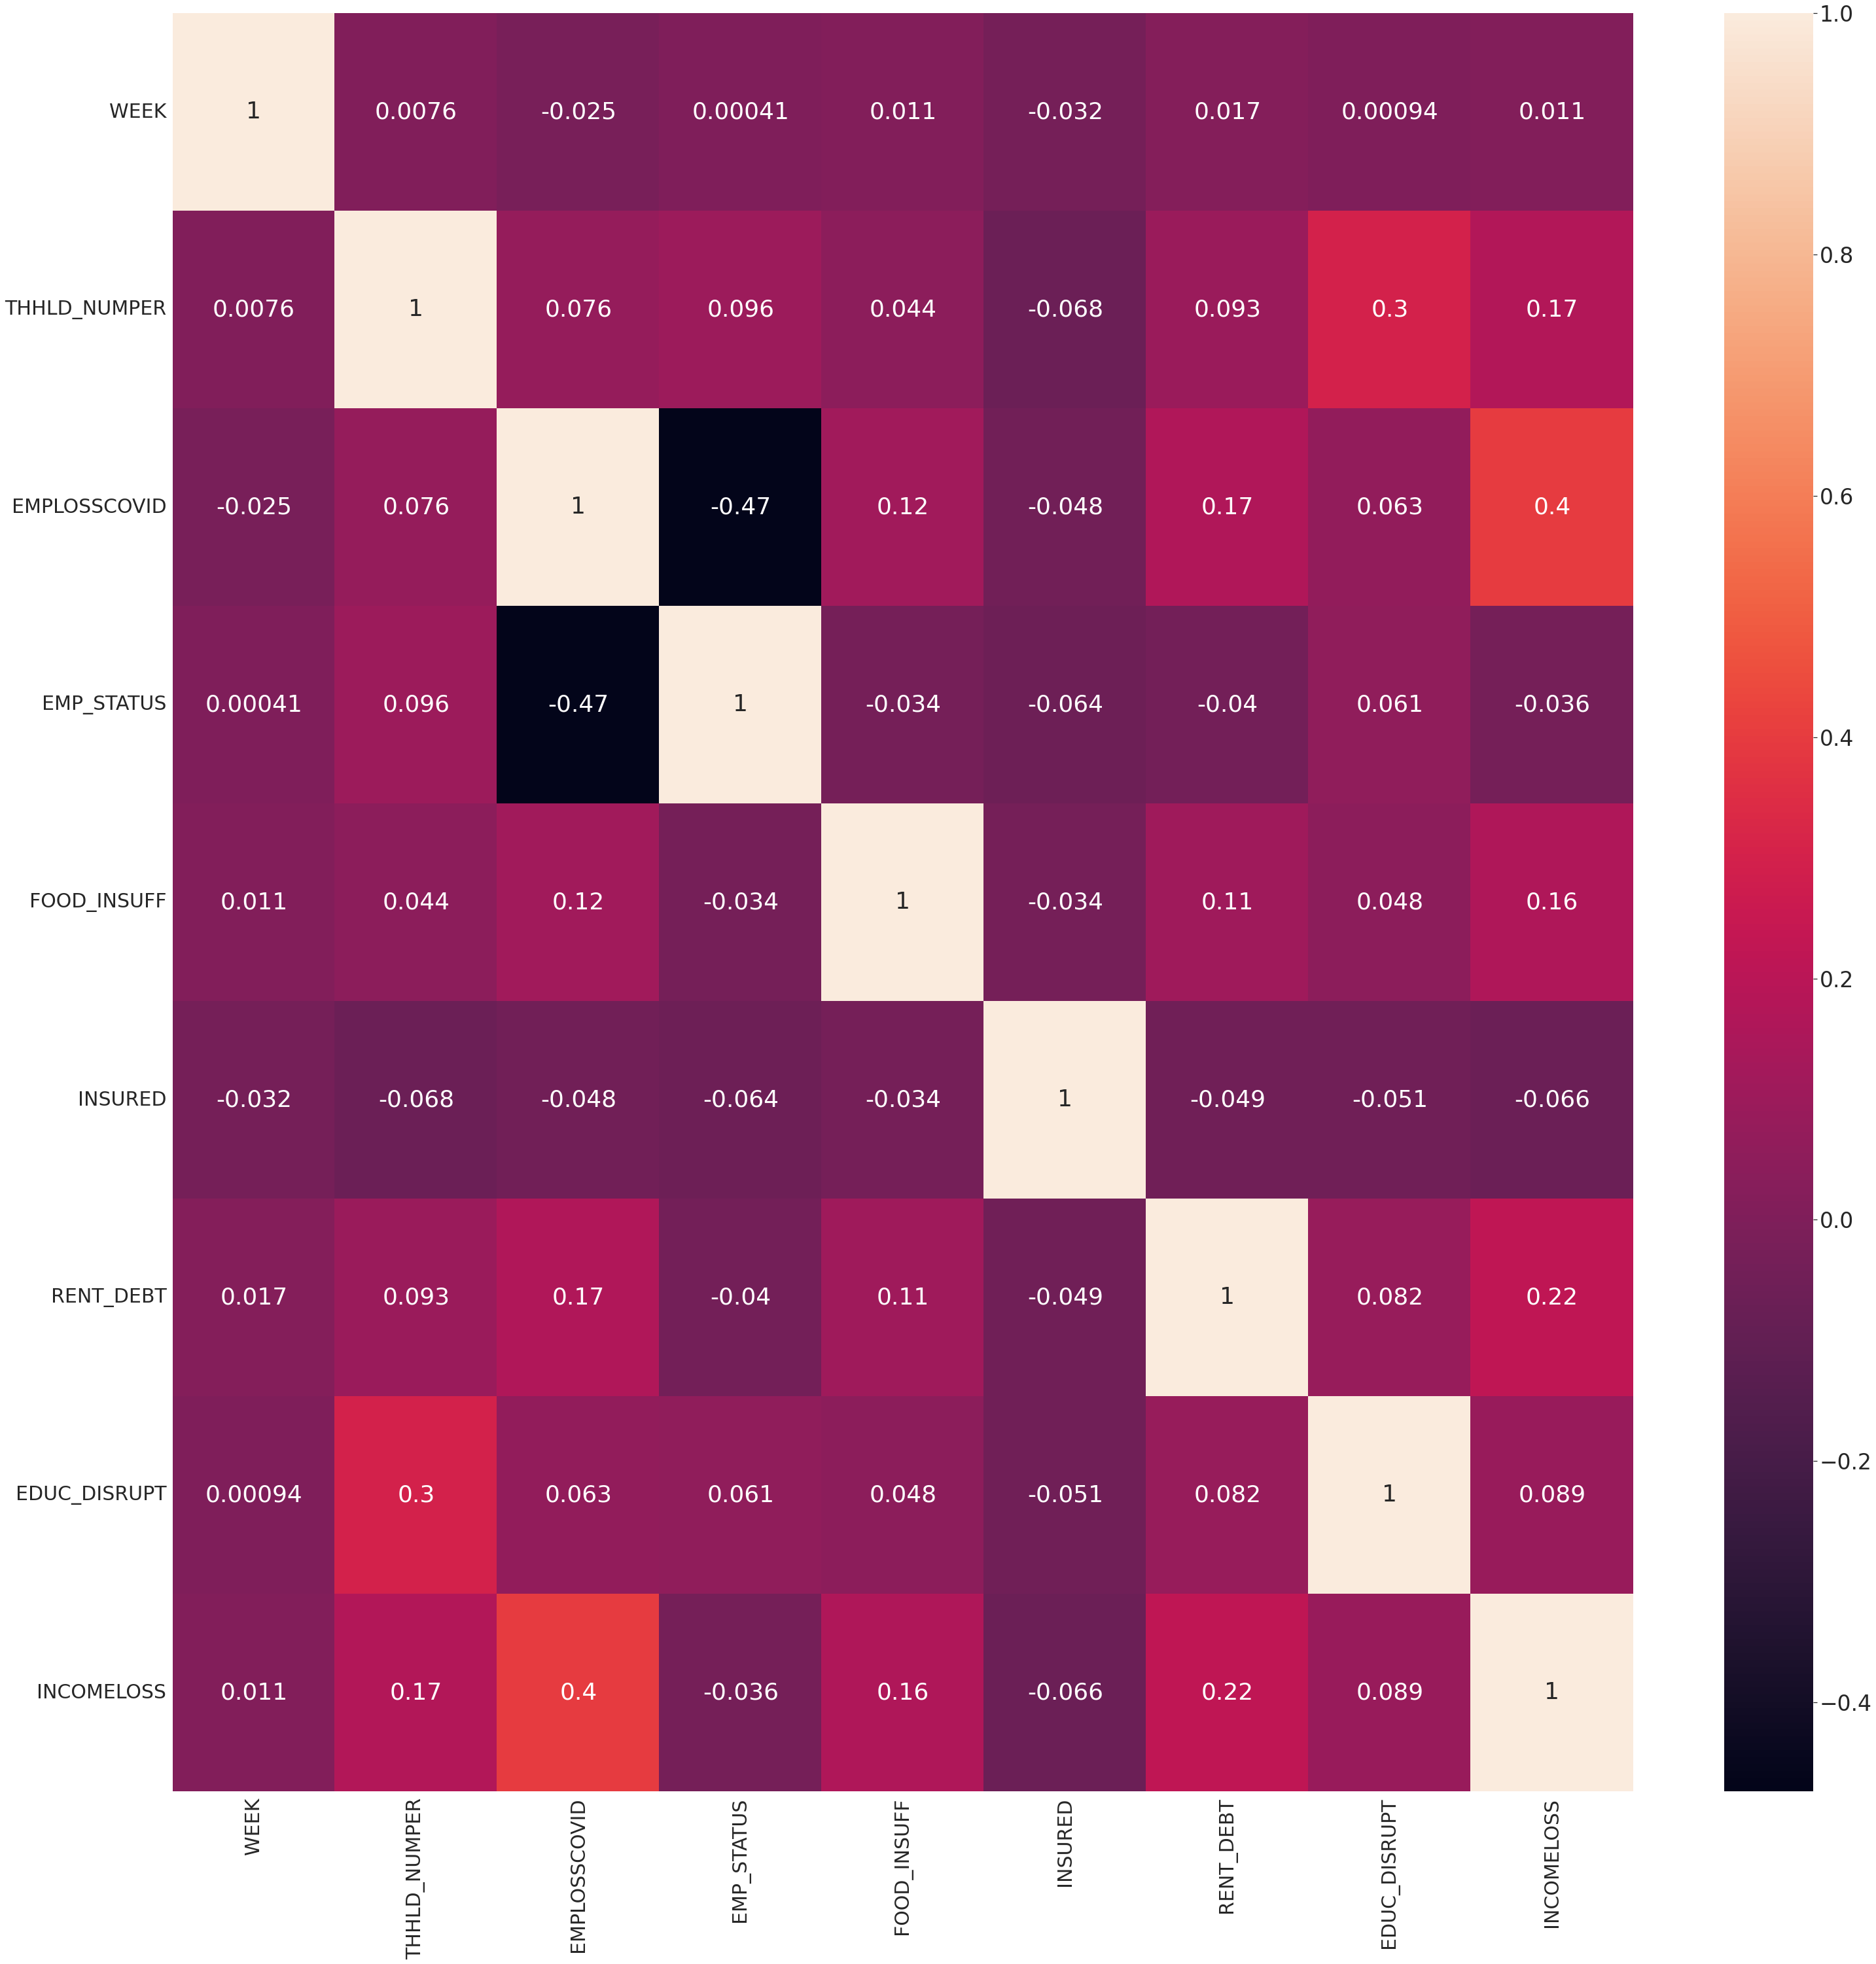

In [266]:
correlations = df1.corr()
sns.set(font_scale=3)
f, ax = plt.subplots(figsize=(50,50))
sns_plot = sns.heatmap(correlations,annot=True)

sns_plot.set_yticklabels(
    sns_plot.get_yticklabels(),
    rotation=360
)

plt.tick_params(labelsize=30)
plt.savefig('images/CorrelationPlot.jpg');

<p>Get the distribution of all the final set of variables from the dataframe using histograms for numerical variables and count plots for categorical variables</p>

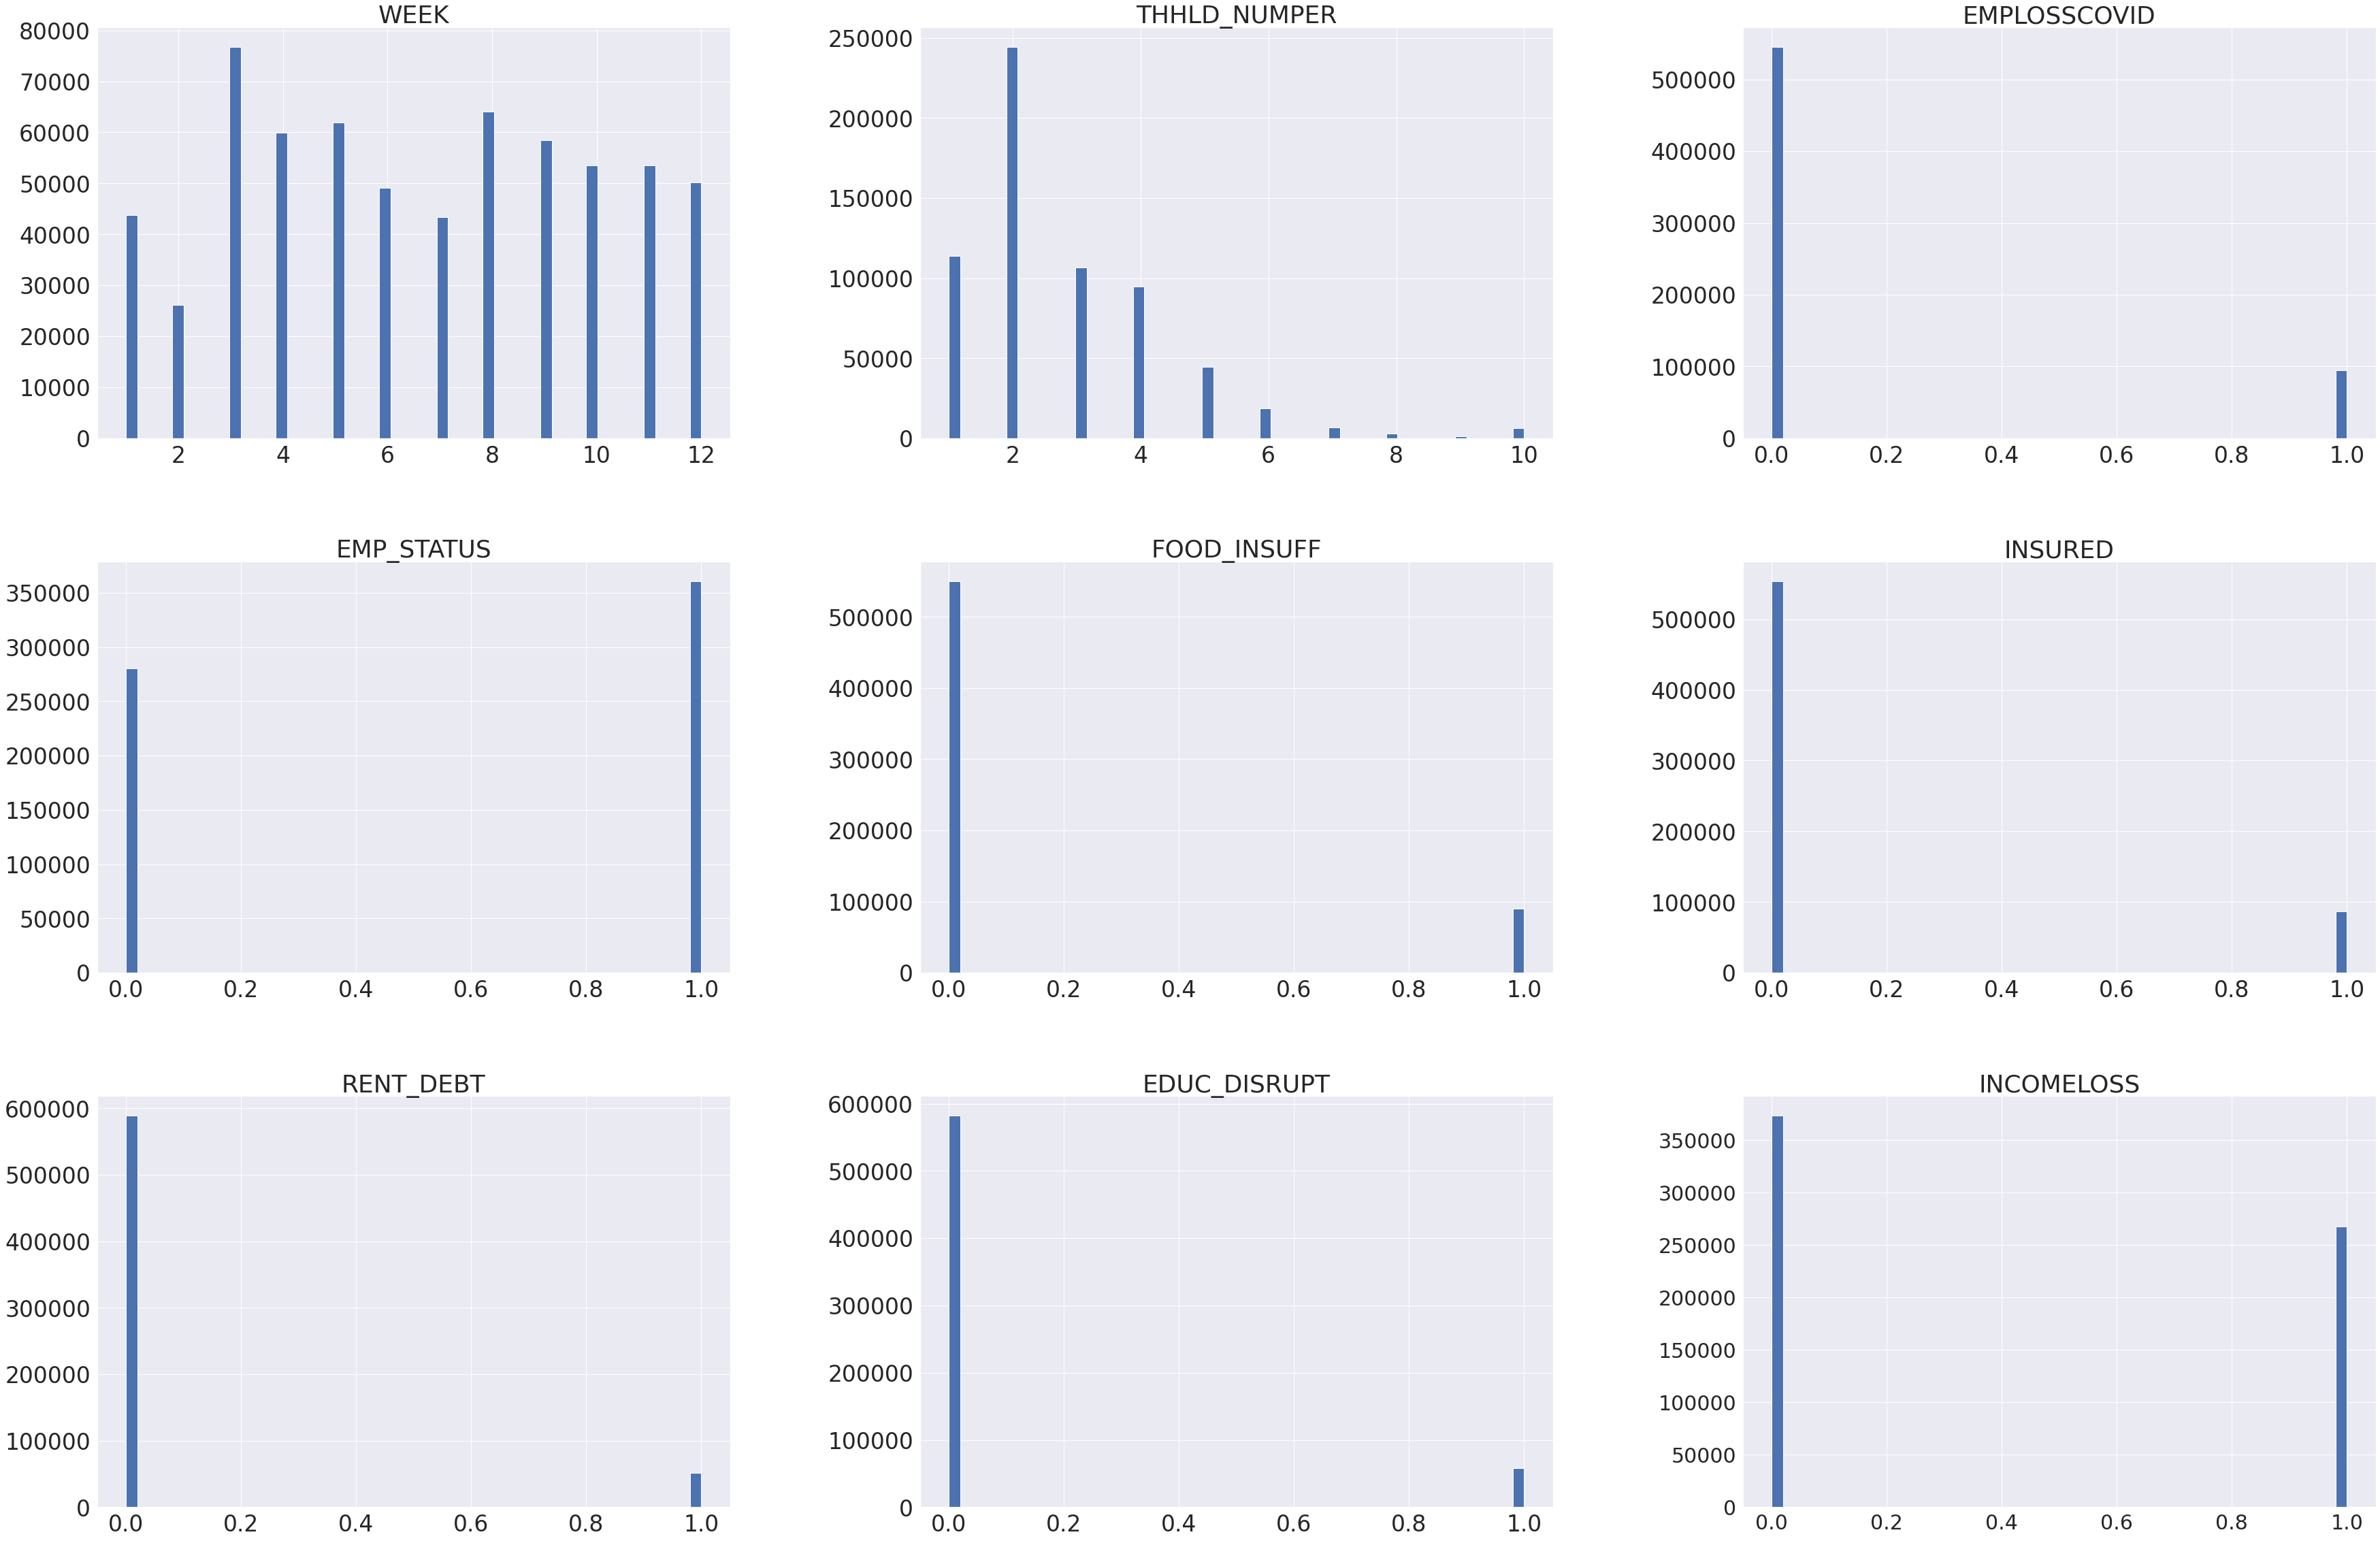

In [267]:
df1.hist(bins=50, figsize=(60,40))
plt.tick_params(labelsize=30)
plt.savefig('images/NumericalVarDistribution.jpg')

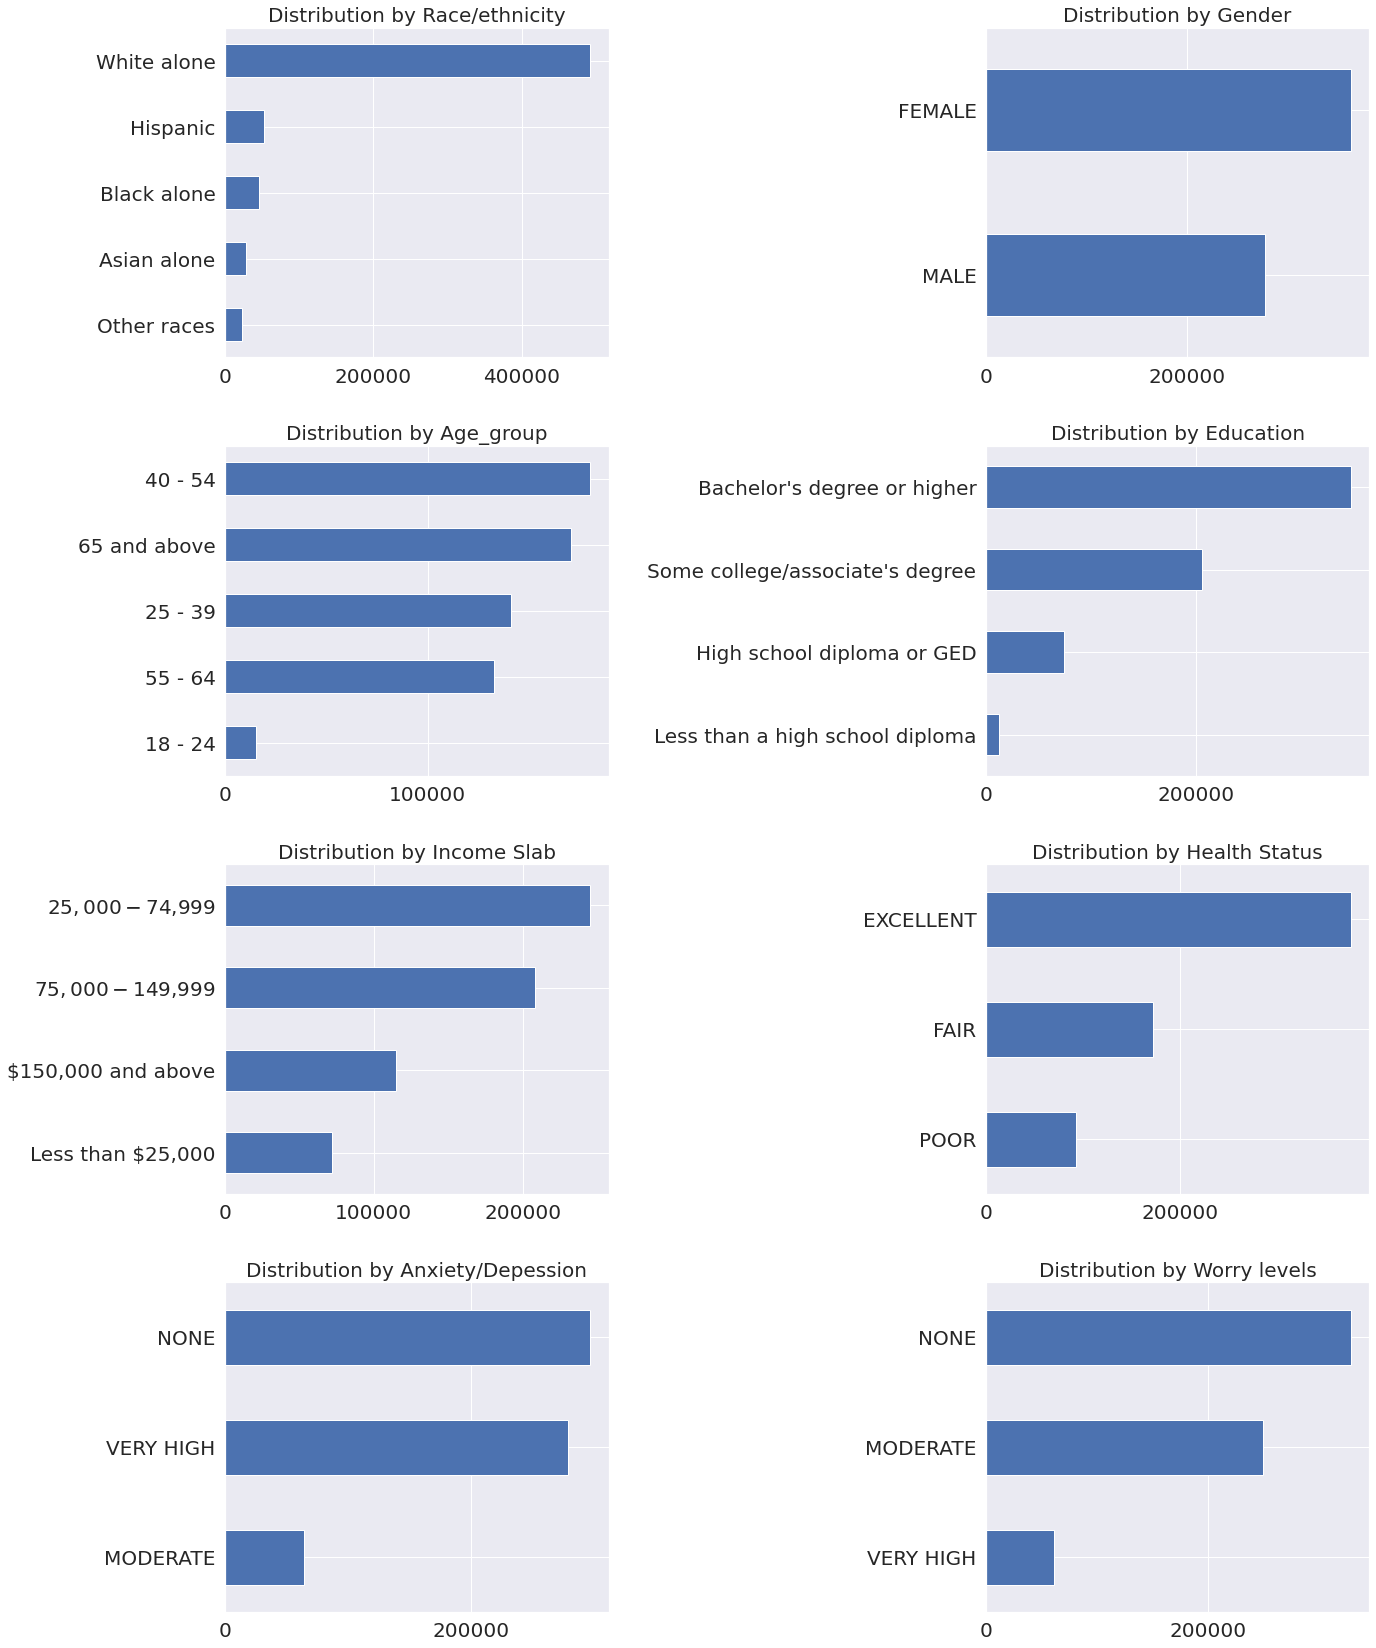

In [268]:
fig, axes = plt.subplots(figsize=(20, 35))
plt.subplot(6,2,1)
plt.title("Distribution by Race/ethnicity", fontsize=20)
df1.RACE_ETHNICITY.value_counts().sort_values().plot(kind='barh', fontsize=20)
plt.subplot(6,2,2)
plt.title("Distribution by Gender", fontsize=20)
df1.EGENDER.value_counts().sort_values().plot(kind='barh', fontsize=20)
plt.subplot(6,2,3)
plt.title("Distribution by Age_group", fontsize=20)
df1.AGE_GROUP.value_counts().sort_values().plot(kind='barh', fontsize=20)
plt.subplot(6,2,4)
plt.title("Distribution by Education", fontsize=20)
df1.EDUC.value_counts().sort_values().plot(kind='barh', fontsize=20)
plt.subplot(6,2,5)
plt.title("Distribution by Income Slab", fontsize=20)
df1.INCOME_LEV.value_counts().sort_values().plot(kind='barh', fontsize=20)
plt.subplot(6,2,6)
plt.title("Distribution by Health Status", fontsize=20)
df1.HLTHSTATUS.value_counts().sort_values().plot(kind='barh', fontsize=20)
plt.subplot(6,2,7)
plt.title("Distribution by Anxiety/Depession", fontsize=20)
df1.ANXIETY_DEPRESSION.value_counts().sort_values().plot(kind='barh', fontsize=20)
plt.subplot(6,2,8)
plt.title("Distribution by Worry levels", fontsize=20)
df1.WORRY.value_counts().sort_values().plot(kind='barh', fontsize=20)
plt.tight_layout()
fig.savefig('images/CategoricalVarDistribtuion.jpg')

<p>Write the dataframe into comma seperated text file which will be used as input to Analysis.ipynb file</p>

In [269]:
df1.to_csv("covid_clean_data.csv", sep=',')